Sentiment analysis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud

In [14]:
# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('dataset.csv')

In [16]:
# Select top 10 games by number of reviews
top_games = data['app_name'].value_counts().nlargest(10).index.to_list()
top_games.append('Counter-Strike')
data = data[data['app_name'].isin(top_games)]

In [17]:
data.head()

app_id        app_name                                        review_text  \
0      10  Counter-Strike                                    Ruined my life.   
1      10  Counter-Strike  This will be more of a ''my experience with th...   
2      10  Counter-Strike                      This game saved my virginity.   
3      10  Counter-Strike  • Do you like original games? • Do you like ga...   
4      10  Counter-Strike           Easy to learn, hard to master.             

   review_score  review_votes  
0             1             0  
1             1             1  
2             1             0  
3             1             0  
4             1             1

In [18]:
unique_values = data['app_name'].unique()

print("\nUnique values in column:")
print(len(unique_values))
for app in unique_values:
    print(app)


Unique values in column:
11
Counter-Strike
Terraria
PAYDAY 2
DayZ
Warframe
Rust
Rocket League
Grand Theft Auto V
Undertale
Left 4 Dead 2
Dota 2


In [19]:
# Data Preprocessing
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

In [20]:
data['cleaned_review'] = data['review_text'].apply(clean_text)

In [21]:
data.to_csv('processed_data.csv')

In [22]:
# Sentiment Analysis
def get_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
data['sentiment'] = data['cleaned_review'].apply(get_sentiment)


Sentiment Analysis for PAYDAY 2
sentiment
Positive    48829
Negative    27383
Neutral     12761
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


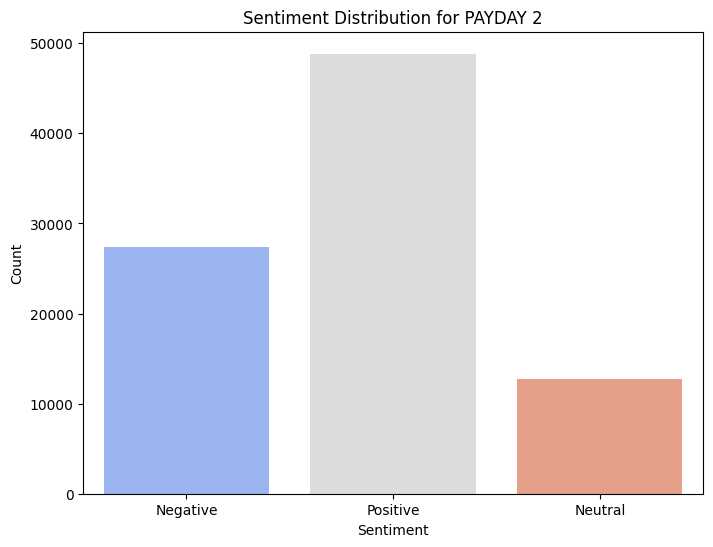

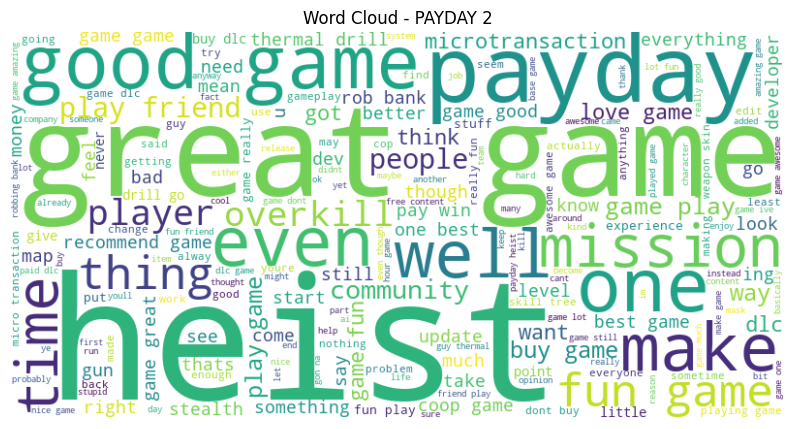


Sentiment Analysis for DayZ
sentiment
Positive    88850
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


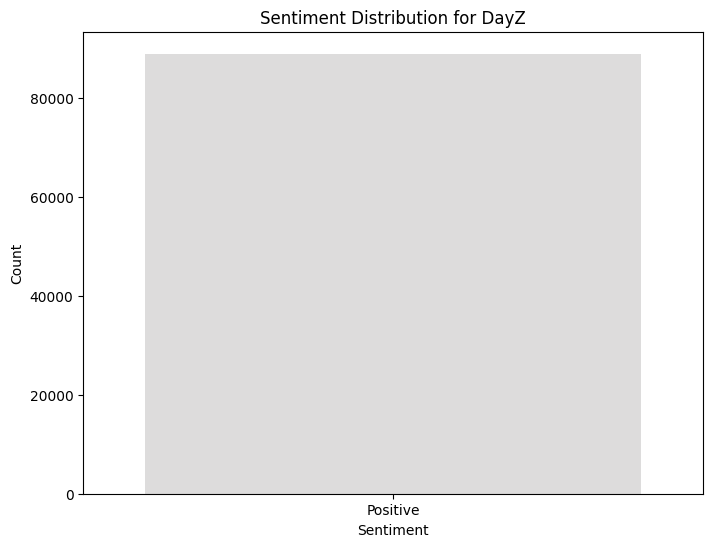

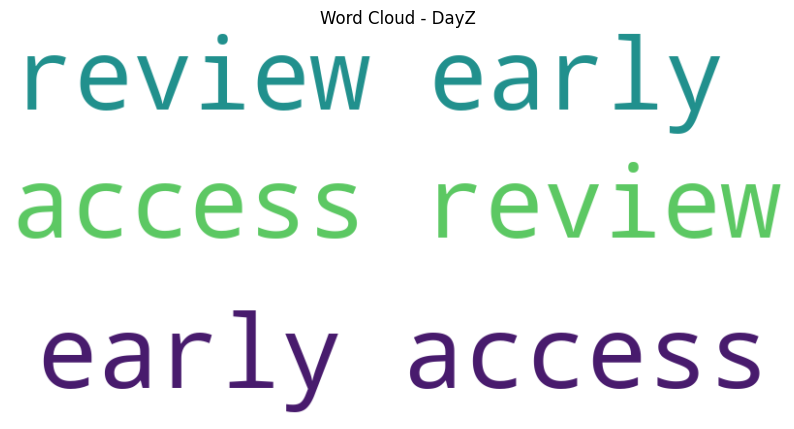


Sentiment Analysis for Terraria
sentiment
Positive    54017
Negative    21996
Neutral      8815
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


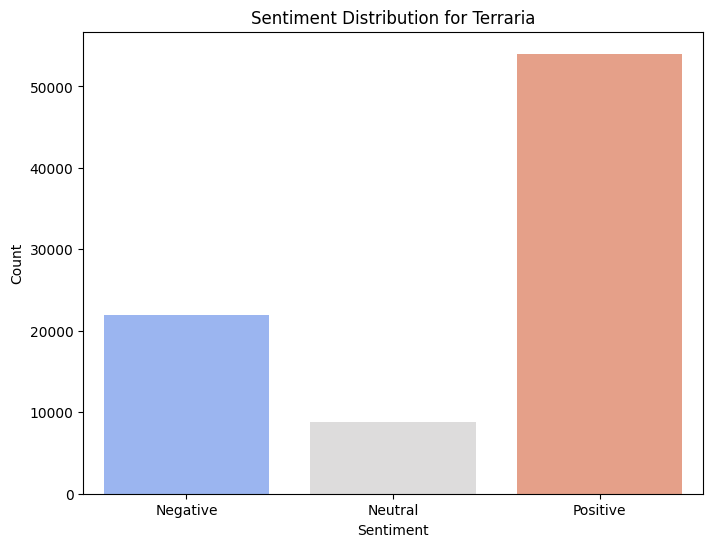

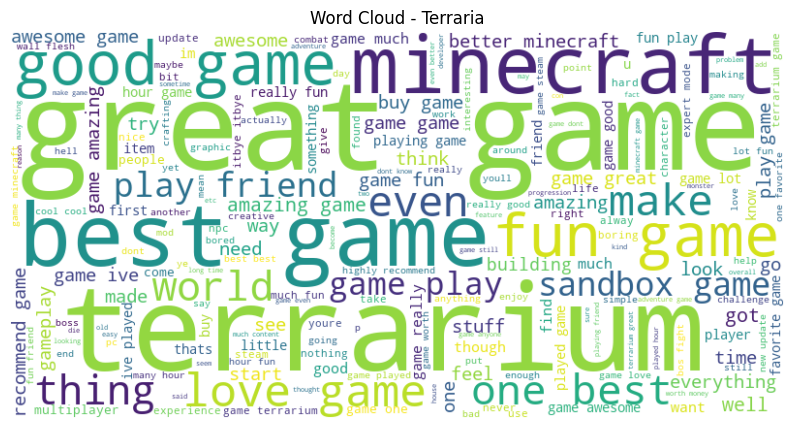


Sentiment Analysis for Rust
sentiment
Positive    77036
Negative        1
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


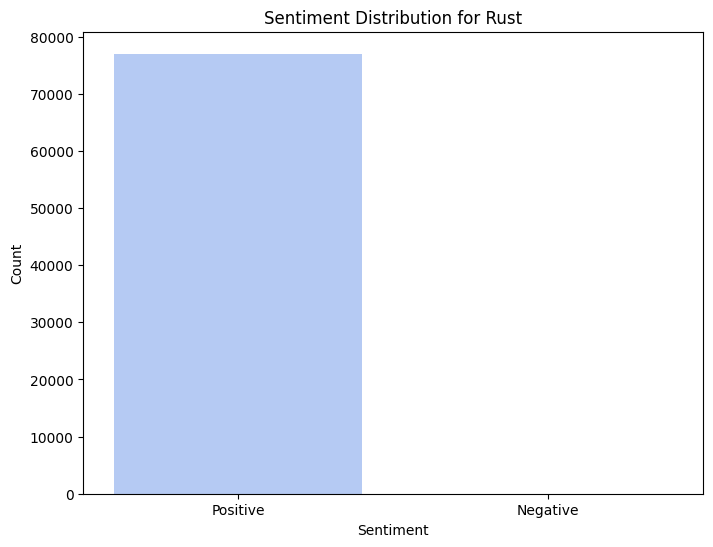

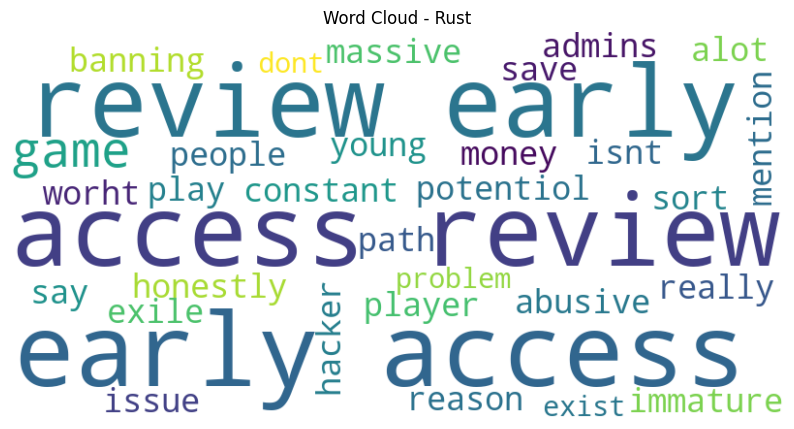


Sentiment Analysis for Dota 2
sentiment
Positive    38442
Negative    21281
Neutral     13818
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


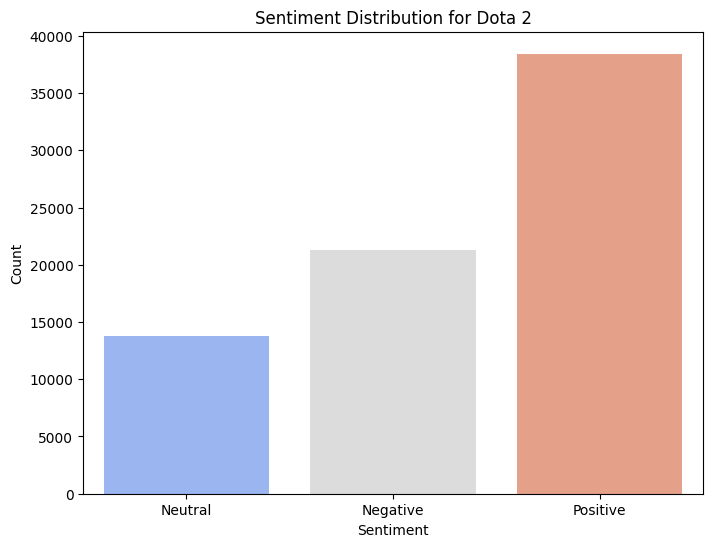

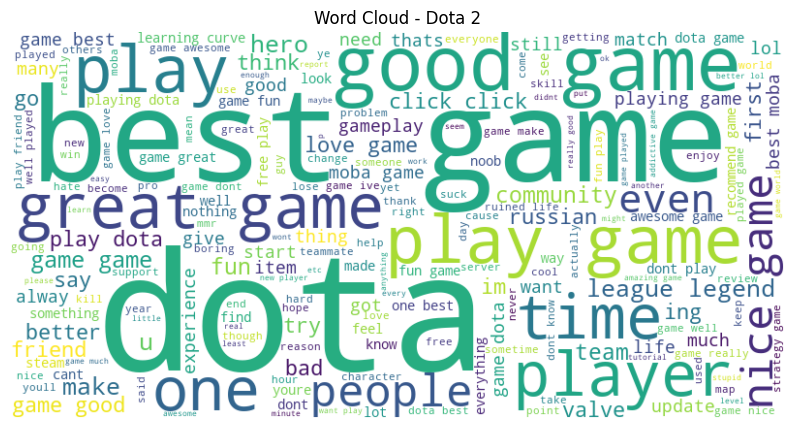


Sentiment Analysis for Rocket League
sentiment
Positive    32569
Negative    15038
Neutral      6620
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


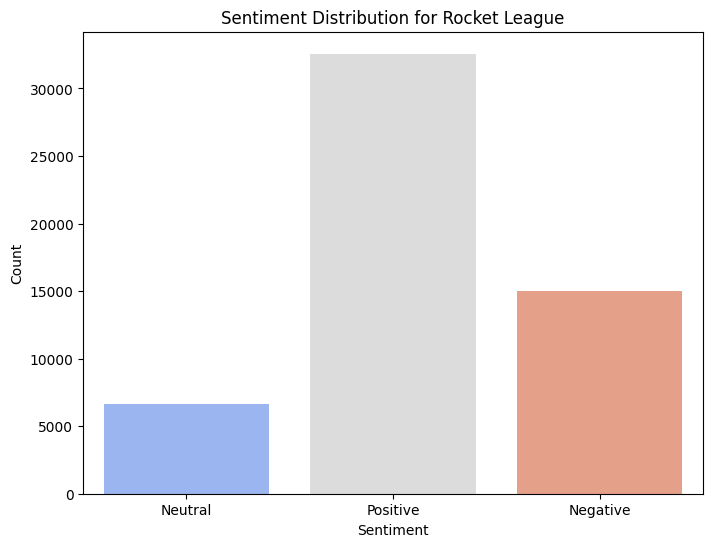

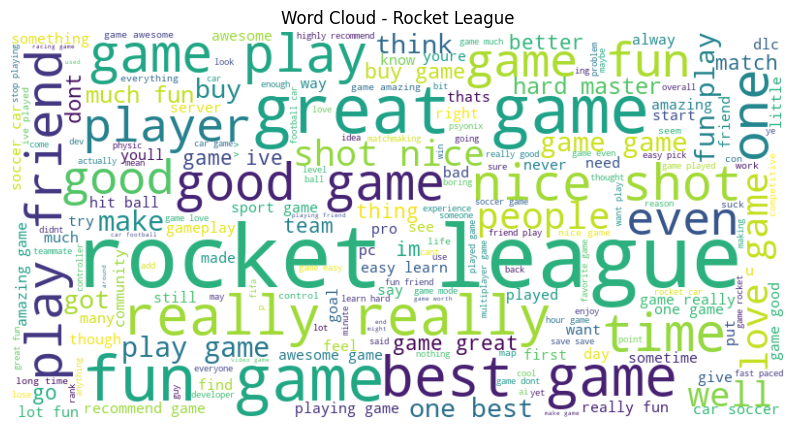


Sentiment Analysis for Undertale
sentiment
Positive    31772
Negative    14765
Neutral      5381
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


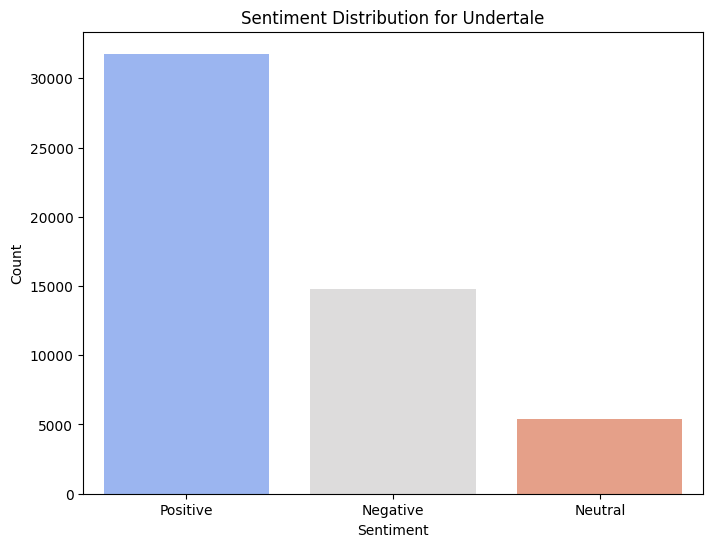

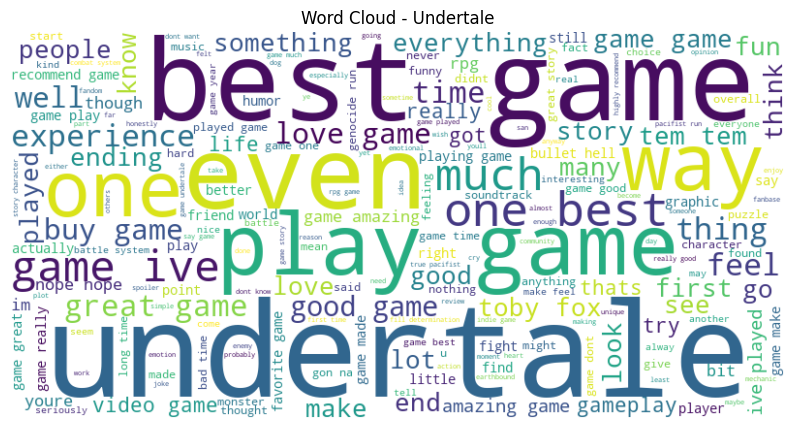


Sentiment Analysis for Left 4 Dead 2
sentiment
Positive    31355
Negative    13429
Neutral      6196
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


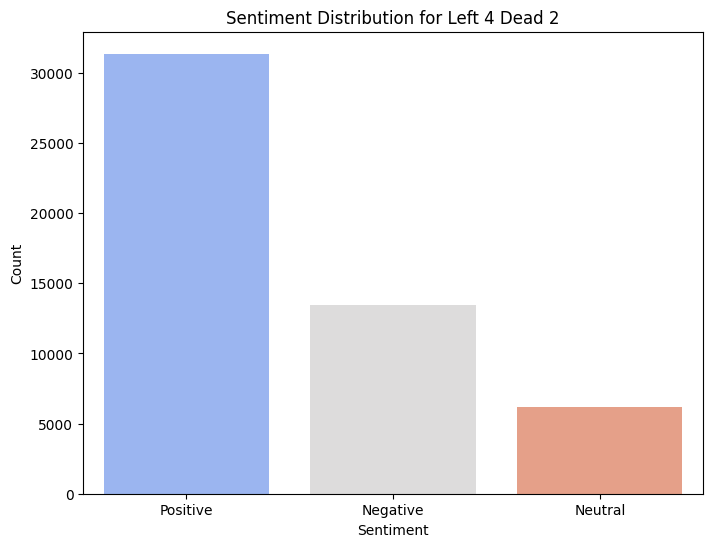

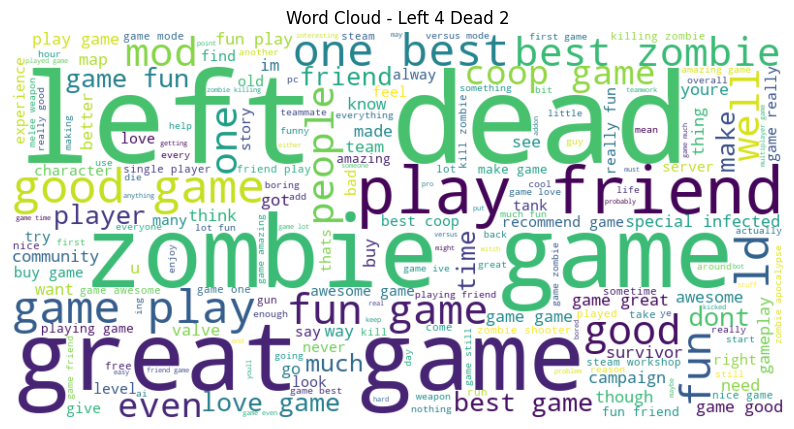


Sentiment Analysis for Warframe
sentiment
Positive    30600
Negative    12145
Neutral      5484
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


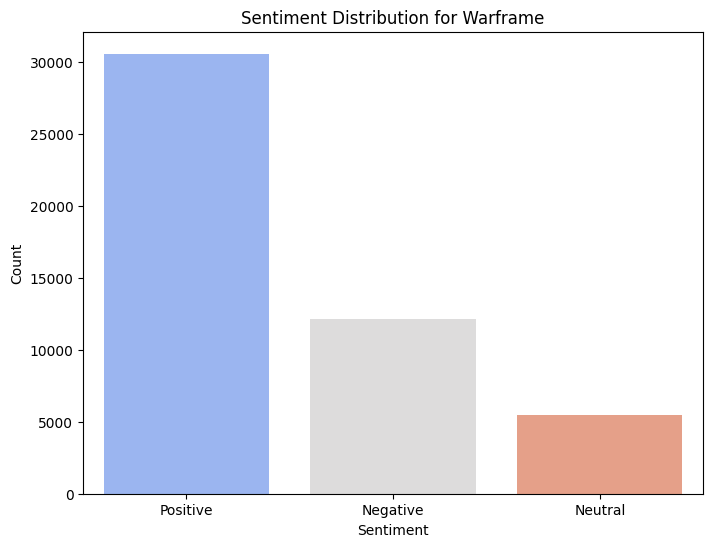

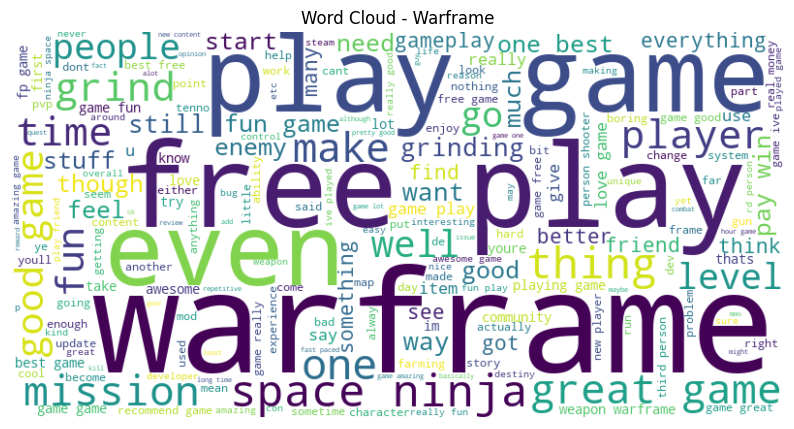


Sentiment Analysis for Grand Theft Auto V
sentiment
Positive    24161
Negative    12296
Neutral      5917
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


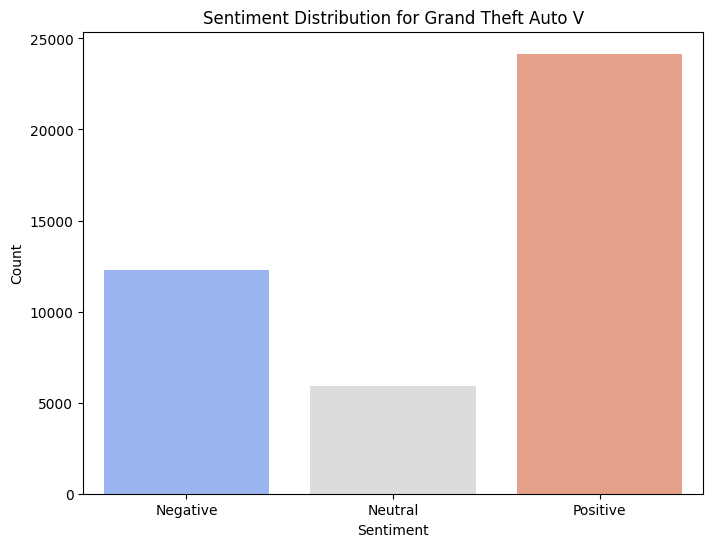

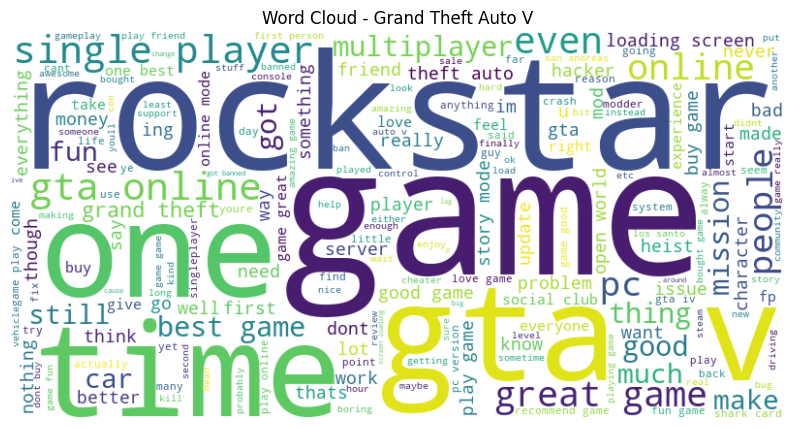


Sentiment Analysis for Counter-Strike
sentiment
Positive    7391
Neutral     2657
Negative    2305
Name: count, dtype: int64


C:\Users\anton\AppData\Local\Temp\ipykernel_11636\1920400993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=game_df, palette='coolwarm')


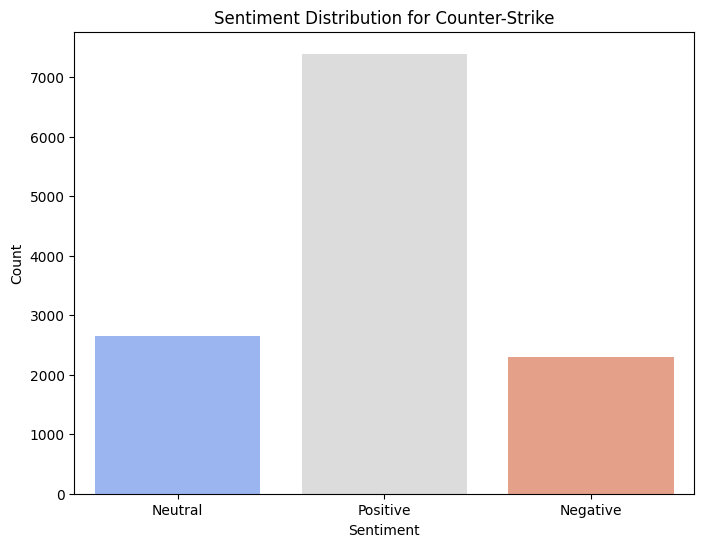

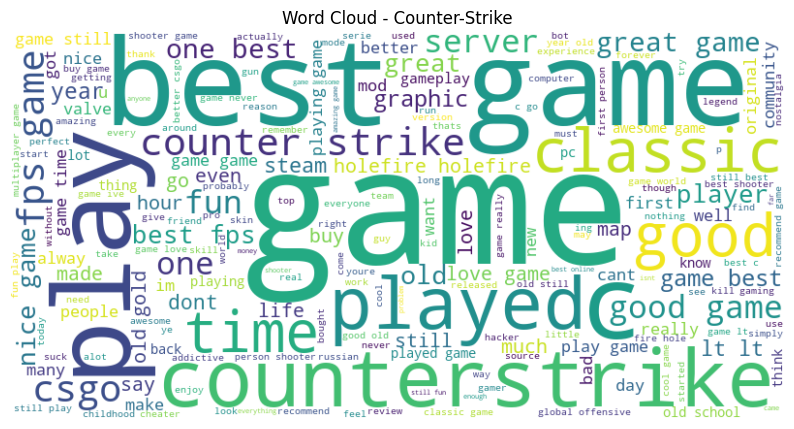

In [24]:
# EDA for each game
for game in top_games:
    game_df = data[data['app_name'] == game]
    print(f"\nSentiment Analysis for {game}")
    print(game_df['sentiment'].value_counts())

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.countplot(x='sentiment', data=game_df, palette='coolwarm')
    plt.title(f"Sentiment Distribution for {game}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

    # Wordcloud for each game
    game_text = ' '.join(game_df['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(game_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {game}")
    plt.show()